In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
graph_path = './bionlp-shared-task-entity-normalization/data/ontobiotope.gph'
enriched_graph_path = './bionlp-shared-task-entity-normalization/data/enriched_ontobiotope.gph'
id_name_mapping_path = './bionlp-shared-task-entity-normalization/data/ontobiotope_id_name_mapping.json'

In [3]:
graph = nx.read_edgelist(graph_path, data=False)
enriched_graph = nx.read_edgelist(enriched_graph_path, data=False)

In [4]:
with open(id_name_mapping_path) as f:
    id_name_mapping = json.load(f)

In [5]:
print("Number of Edges in Graph: ", str(len(list(graph.edges)))) 
print("Number of Edges in Enriched Graph: ", str(len(list(enriched_graph.edges)))) 

Number of Edges in Graph:  2528
Number of Edges in Enriched Graph:  3610


In [6]:
print("Number of Nodes in Graph: ", str(len(list(graph.nodes)))) 
print("Number of Nodes in Enriched Graph: ", str(len(list(enriched_graph.nodes)))) 

Number of Nodes in Graph:  2320
Number of Nodes in Enriched Graph:  2320


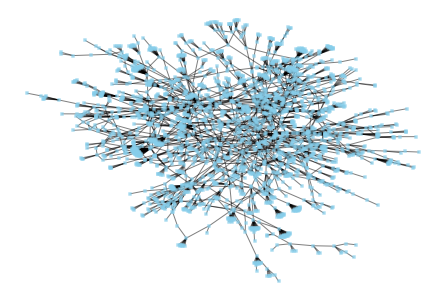

In [7]:
nx.spring_layout(graph)
nx.draw(graph, with_labels=False, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=2)
plt.draw()
plt.savefig("graph.png", dpi=500, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1) 


## Importance of a Node

#### Centrality: Discover the most important nodes. 

###### 1. Degree centrality: Assign an importance score to the nodes according to the number of incoming and outgoing relationships from that node.

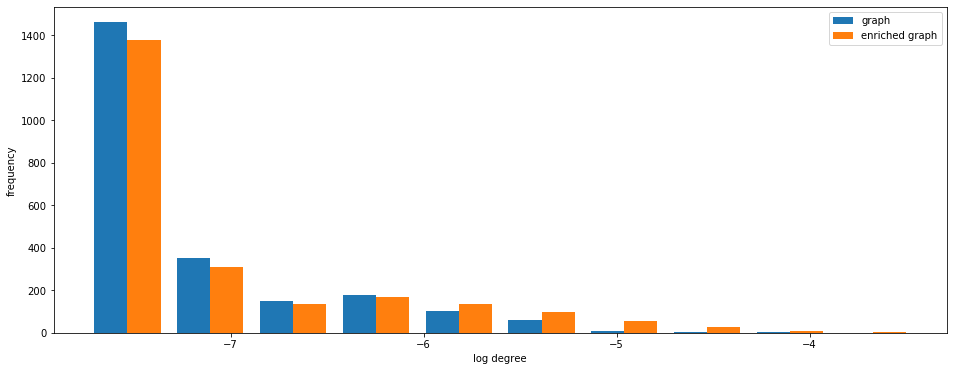

In [8]:
degree_centrality_graph = nx.degree_centrality(graph)
degree_centrality_enriched_graph = nx.degree_centrality(enriched_graph)

plt.figure(figsize=(16,6))
plt.hist([np.log(list(degree_centrality_graph.values())), np.log(list(degree_centrality_enriched_graph.values()))], label=['graph', 'enriched graph'])
plt.legend(loc='upper right')
plt.ylabel('frequency')
plt.xlabel('log degree')
plt.show()

In [9]:
df_graph_degree_centrality = pd.DataFrame(degree_centrality_graph.values(), index=degree_centrality_graph.keys()).sort_index()
df_graph_degree_centrality.columns=['degree_centrality']

df_enriched_graph_degree_centrality = pd.DataFrame(degree_centrality_enriched_graph.values(), index=degree_centrality_enriched_graph.keys()).sort_index()
df_enriched_graph_degree_centrality.columns=['degree_centrality']

In [26]:
df_diff_degree_centrality = (df_graph_degree_centrality - df_enriched_graph_degree_centrality).abs()
df_diff_degree_centrality['name'] = [id_name_mapping[node_id] for node_id in df_diff_degree_centrality.index]
df_diff_degree_centrality.query('degree_centrality > 0').sort_values(by='degree_centrality', ascending=False).head(10)

,degree_centrality,name
OBT:000001,0.026304,experimental medium
OBT:000316,0.022423,blood
OBT:000056,0.021992,cell
OBT:002216,0.020699,patient with infectious disease
OBT:001804,0.016818,human
OBT:000033,0.016386,microflora
OBT:002133,0.016386,patient
OBT:001423,0.011643,medical center
OBT:000571,0.010349,blood serum
OBT:002307,0.010349,pediatric patient


In [38]:
neighbors_graph_degree = [n for n in graph.neighbors('OBT:000001')]
list_neighbors_graph_degree = [id_name_mapping[n] for n in neighbors_graph_degree]
print(f'Number of neigbors of the node in the original graph with the highest degree: {len(list_neighbors_graph_degree)}')
print(list_neighbors_graph_degree, end=" ")

Number of neigbors of the node in the original graph with the highest degree: 12
['antibiotic-containing media', 'yeast extract', 'non-immune serum', 'bacteria habitat', 'biofilm reactor', 'cell culture', 'perchlorate-contaminated site', 'bovine serum', 'L-( null )-tartrate enriched soil', 'sterile water', 'agar', 'urea solution'] 

In [39]:
neighbors_enriched_graph_degree = [n for n in enriched_graph.neighbors('OBT:000001')]
list_neighbors_enriched_graph_degree = [id_name_mapping[n] for n in neighbors_enriched_graph_degree]
print(f'Number of neigbors of the node in the enriched graph with the highest degree: {len(list_neighbors_enriched_graph_degree)}')
print(list_neighbors_enriched_graph_degree, end=" ")

Number of neigbors of the node in the enriched graph with the highest degree: 73
['soybean', 'cell', 'antibiotic-containing media', 'yeast extract', 'non-immune serum', 'bacteria habitat', 'biofilm reactor', 'cell culture', 'perchlorate-contaminated site', 'bovine serum', 'L-( null )-tartrate enriched soil', 'sterile water', 'agar', 'urea solution', 'whole egg', 'egg and egg products', 'elderly patient', 'nursing home', 'medical center', 'patient', 'nose', 'nasal secretion', 'feces', 'rectal swab', 'apple', 'plant tissue', 'garden lettuce', 'frog', 'food for human', 'high salt concentration environment', 'apple juice', 'eye', 'biofilm', 'human', 'cornea', 'epithelium', 'artificial environment', 'jail', 'inmate', 'marine environment', 'Euprymna scolopes', 'light organ', 'young animal', 'yolk sac', 'urethra', 'secretion', 'urine', 'respiratory tract', 'child', 'healthy person', 'microflora', 'throat', 'nasopharynx', 'baby', 'welfare center', 'infant', 'clinic', 'pediatric patient', 'pati

In [49]:
print(f'Difference of two graph: {set(list_neighbors_enriched_graph_degree)-set(list_neighbors_graph_degree)}')

Difference of two graph: {'patient with infectious disease', 'light organ', 'welfare center', 'raw seafood', 'nasal secretion', 'young animal', 'food for human', 'medical environment', 'frog', 'urine', 'laboratory', 'plant tissue', 'epithelium', 'peritoneal fluid', 'inmate', 'marine environment', 'saline water', 'rectal swab', 'eye', 'healthy person', 'elderly patient', 'high salt concentration environment', 'feces', 'human', 'respiratory tract', 'seafood and seafood product', 'baby', 'garden lettuce', 'blood', 'apple', 'apple juice', 'jail', 'infant', 'clinic', 'pediatric patient', 'soybean', 'throat', 'urethra', 'patient with bacteremia', 'skin wound', 'Euprymna scolopes', 'nasopharynx', 'skin', 'patient with cirrhosis', 'nursing home', 'biofilm', 'yolk sac', 'child', 'abdomen', 'whole egg', 'secretion', 'artificial environment', 'nose', 'patient', 'cell', 'pharynx', 'medical center', 'cornea', 'marine water', 'egg and egg products', 'microflora'}


###### 2. Eigencentrality: Measures the importance of a node based on its neighbors.

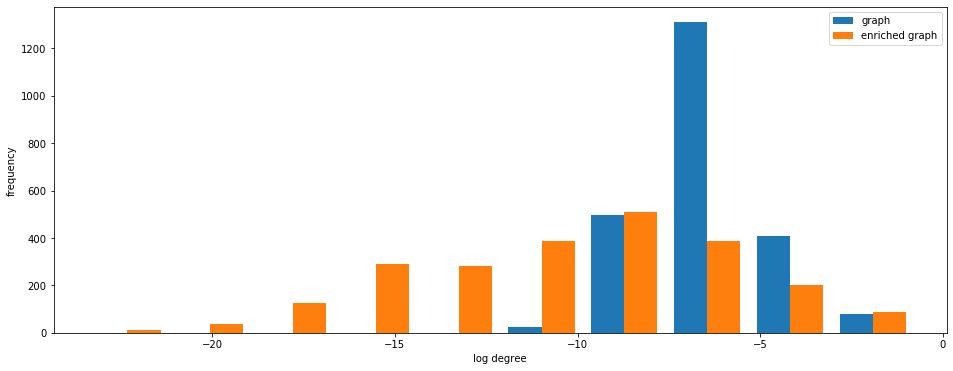

In [11]:
eigen_centrality_graph = nx.eigenvector_centrality(graph, tol=1e-03)
eigen_centrality_enriched_graph = nx.eigenvector_centrality(enriched_graph)

plt.figure(figsize=(16,6))
plt.hist([np.log(list(eigen_centrality_graph.values())), np.log(list(eigen_centrality_enriched_graph.values()))], label=['graph', 'enriched graph'])
plt.legend(loc='upper right')
plt.ylabel('frequency')
plt.xlabel('log degree')
plt.show()

In [12]:
df_graph_eigen_centrality = pd.DataFrame(eigen_centrality_graph.values(), index=eigen_centrality_graph.keys()).sort_index()
df_graph_eigen_centrality.columns=['eigen_centrality']

df_enriched_graph_eigen_centrality = pd.DataFrame(eigen_centrality_enriched_graph.values(), index=eigen_centrality_enriched_graph.keys()).sort_index()
df_enriched_graph_eigen_centrality.columns=['eigen_centrality']

In [17]:
df_diff_eigen_centrality = (df_graph_eigen_centrality - df_enriched_graph_eigen_centrality).abs()
df_diff_eigen_centrality['name'] = [id_name_mapping[node_id] for node_id in df_diff_eigen_centrality.index]
df_diff_eigen_centrality.query('eigen_centrality > 0').sort_values(by='eigen_centrality', ascending=False).head(10)

,eigen_centrality,name
OBT:001224,0.386366,fish meat and fish meat product
OBT:000065,0.367280,animal part
OBT:000001,0.273912,experimental medium
OBT:002216,0.244633,patient with infectious disease
OBT:000316,0.193960,blood
OBT:002133,0.192783,patient
OBT:000033,0.167563,microflora
OBT:001423,0.155234,medical center
OBT:001804,0.153099,human
OBT:002146,0.148559,child


In [43]:
neighbors_graph_eigen = [n for n in graph.neighbors('OBT:001224')]
list_neighbors_graph_eigen = [id_name_mapping[n] for n in neighbors_graph_eigen]
print(f'Number of neigbors of the node in the original graph with the highest eigen degree: {len(list_neighbors_graph_eigen)}')
print(list_neighbors_graph_eigen, end=" ")

Number of neigbors of the node in the original graph with the highest eigen degree: 43
['meat and meat product', 'cooked fish', 'catfish meat', 'madraine fish meat', 'wuchang bream meat', 'freshwater bream meat', 'buegill sunfish meat', 'roache meat', 'tilapia meat', 'carp meat', 'weatherfish meat', 'barb meat', 'wild fish meat', 'farmed fish meat', 'mackerel meat', 'shark meat', 'barracuda meat', 'ray meat', 'paddle fish meat', 'eel meat', 'sturgeon meat', 'perch meat', 'cod meat', 'trout meat', 'sardine meat', 'anchovie meat', 'wolffish meat', 'anglerfish meat', 'bonito meat', 'dolphinfish meat', 'herring emat', 'tuna meat', 'emperor meat', 'mullet meat', 'whitefish meat', 'shad meat', 'flouder meat', 'halibut meat', 'sole meat', 'turbot meat', 'haddock meat', 'hake meat', 'smelt meat'] 

In [44]:
neighbors_enriched_graph_eigen = [n for n in enriched_graph.neighbors('OBT:001224')]
list_neighbors_enriched_graph_eigen = [id_name_mapping[n] for n in neighbors_enriched_graph_eigen]
print(f'Number of neigbors of the node in the enriched graph with the highest eigen degree: {len(list_neighbors_enriched_graph_eigen)}')
print(list_neighbors_enriched_graph_eigen, end=" ")

Number of neigbors of the node in the enriched graph with the highest eigen degree: 57
['microflora', 'food processing factory', 'garden vegetable and primary derivative thereof', 'dried food', 'agricultural product', 'additive', 'pesticide', 'meat and meat product', 'poultry meat', 'food for human', 'water', 'fruit', 'cooked fish', 'catfish meat', 'madraine fish meat', 'wuchang bream meat', 'freshwater bream meat', 'buegill sunfish meat', 'roache meat', 'tilapia meat', 'carp meat', 'weatherfish meat', 'barb meat', 'wild fish meat', 'farmed fish meat', 'mackerel meat', 'shark meat', 'barracuda meat', 'ray meat', 'paddle fish meat', 'eel meat', 'sturgeon meat', 'perch meat', 'cod meat', 'trout meat', 'sardine meat', 'anchovie meat', 'wolffish meat', 'anglerfish meat', 'bonito meat', 'dolphinfish meat', 'herring emat', 'tuna meat', 'emperor meat', 'mullet meat', 'whitefish meat', 'shad meat', 'flouder meat', 'halibut meat', 'sole meat', 'turbot meat', 'haddock meat', 'hake meat', 'smelt 

In [48]:
print(f'Difference of two graph: {set(list_neighbors_enriched_graph_eigen)-set(list_neighbors_graph_eigen)}')

Difference of two graph: {'pesticide', 'agricultural product', 'water', 'sugar', 'whole egg', 'food processing factory', 'microflora', 'mammal meat', 'dried food', 'poultry meat', 'food for human', 'fruit', 'garden vegetable and primary derivative thereof', 'additive'}
